In [1]:
import numpy as np
import dxchange
import matplotlib.pyplot as plt
import cupy as cp
import scipy.ndimage as ndimage
import numpy as np
import sys
from matplotlib_scalebar.scalebar import ScaleBar
%matplotlib inline

astropy module not found
olefile module not found


In [2]:
n = 256  # object size in each dimension
ntheta = 180  # number of angles (rotations)

center = n/2  # rotation axis

# ID16a setup
ndist = 4

detector_pixelsize = 3e-6
energy = 17.05  # [keV] xray energy
wavelength = 1.2398419840550367e-09/energy  # [m] wave length

focusToDetectorDistance = 1.208  # [m]
sx0 = -2.493e-3
z1 = np.array([1.5335e-3, 1.7065e-3, 2.3975e-3, 3.8320e-3])[:ndist]-sx0
z2 = focusToDetectorDistance-z1
distances = (z1*z2)/focusToDetectorDistance
magnifications = focusToDetectorDistance/z1
voxelsize = detector_pixelsize/magnifications[0]*2048/n  # object voxel size

norm_magnifications = magnifications/magnifications[0]
# scaled propagation distances due to magnified probes
distances = distances*norm_magnifications**2

z1p = z1[0]  # positions of the probe for reconstruction
z2p = z1-np.tile(z1p, len(z1))
# magnification when propagating from the probe plane to the detector
magnifications2 = (z1p+z2p)/z1p
# propagation distances after switching from the point source wave to plane wave,
distances2 = (z1p*z2p)/(z1p+z2p)
norm_magnifications2 = magnifications2/(z1p/z1[0])  # normalized magnifications
# scaled propagation distances due to magnified probes
distances2 = distances2*norm_magnifications2**2
distances2 = distances2*(z1p/z1)**2

# allow padding if there are shifts of the probe
pad = n//16
show=True
# sample size after demagnification
ne = int(np.ceil((n+2*pad)/norm_magnifications[-1]/8))*8  # make multiple of 8
z1s = float(-7e-4)
flg = f'{z1s}'

In [3]:
rec_u = dxchange.read_tiff(f'/data/vnikitin/u{flg}.tiff')
rec_psi = dxchange.read_tiff(f'/data/vnikitin/rec_angle{flg}.tiff')
rec_prb_angle = dxchange.read_tiff(f'/data/vnikitin/rec_prb_angle{flg}.tiff')
rec_prb_abs = dxchange.read_tiff(f'/data/vnikitin/rec_prb_abs{flg}.tiff')


print(rec_u.shape)



(488, 488, 488)


In [4]:
vvmax = 0.1
vvmin = -2.5
def mshow(a,**args):
    aa=a.copy()
    aa[0,0]=vvmin
    aa[0,1]=vvmax
    plt.imshow(aa,**args)

mkdir: cannot create directory ‘figs’: File exists
mkdir: cannot create directory ‘figs’: File exists


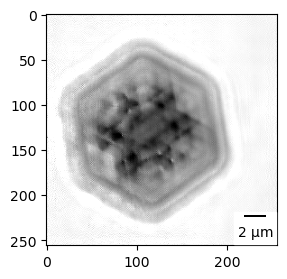

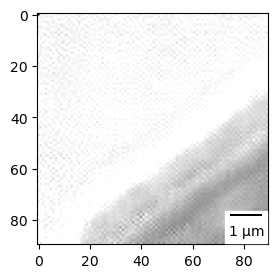

In [5]:
fig, ax = plt.subplots(1, figsize=(3,3))
mshow(rec_psi[0,rec_u.shape[0]//2-n//2:rec_u.shape[0]//2+n//2,rec_u.shape[0]//2-n//2:rec_u.shape[0]//2+n//2],cmap='gray',vmin=vvmin,vmax=vvmax)
ax.add_artist(ScaleBar(voxelsize,location='lower right'))
# plt.colorbar()
# plt.show()
!mkdir figs
plt.savefig(f'figs/rec_psi{flg}.png',dpi=300,bbox_inches='tight')


fig, ax = plt.subplots(1, figsize=(3,3))
mshow(rec_psi[0,pad+20+80:pad+20+90+80,pad+20+80:pad+20+90+80],cmap='gray',vmin=vvmin,vmax=vvmax)
ax.add_artist(ScaleBar(voxelsize,location='lower right'))
# plt.colorbar()
# plt.show()
!mkdir figs
plt.savefig(f'figs/rec_psis{flg}.png',dpi=300,bbox_inches='tight')



mkdir: cannot create directory ‘figs’: File exists
mkdir: cannot create directory ‘figs’: File exists
mkdir: cannot create directory ‘figs’: File exists
mkdir: cannot create directory ‘figs’: File exists


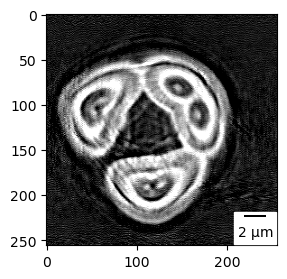

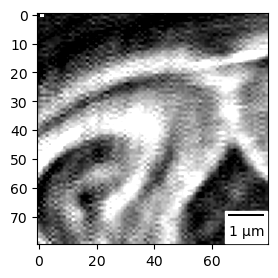

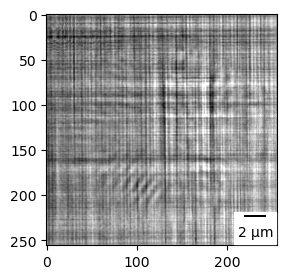

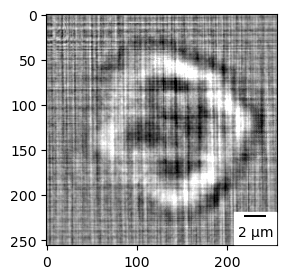

In [6]:

fig, ax = plt.subplots(1, figsize=(3,3))
mshow(-rec_u[rec_u.shape[0]//2-n//2:rec_u.shape[0]//2+n//2,ne//2-8,rec_u.shape[0]//2-n//2:rec_u.shape[0]//2+n//2],cmap='gray',vmin=-3.5e-7,vmax=3.4e-6)
ax.add_artist(ScaleBar(voxelsize,location='lower right'))
# plt.colorbar()
# plt.show()
!mkdir figs
plt.savefig(f'figs/rec_u{flg}.png',dpi=300,bbox_inches='tight')

fig, ax = plt.subplots(1, figsize=(3,3))
mshow(-rec_u[rec_u.shape[0]//2-n//2+40:rec_u.shape[0]//2-n//2+40+80,ne//2-8,rec_u.shape[0]//2-n//2+40:rec_u.shape[0]//2-n//2+40+80],cmap='gray',vmin=-3.5e-7,vmax=3.4e-6)
ax.add_artist(ScaleBar(voxelsize,location='lower right'))
# plt.colorbar()
# plt.show()
!mkdir figs
plt.savefig(f'figs/rec_us{flg}.png',dpi=300,bbox_inches='tight')


fig, ax = plt.subplots(1, figsize=(3,3))
mshow(rec_prb_abs[0,pad:-pad,pad:-pad],cmap='gray',vmin=0.5,vmax=1.4)
ax.add_artist(ScaleBar(voxelsize,location='lower right'))
# plt.colorbar()
# plt.show()
!mkdir figs
plt.savefig(f'figs/rec_prb_abs{flg}.png',dpi=300,bbox_inches='tight')

fig, ax = plt.subplots(1, figsize=(3,3))
mshow(rec_prb_angle[0,pad:-pad,pad:-pad],cmap='gray',vmin=-0.5,vmax=0.4)
ax.add_artist(ScaleBar(voxelsize,location='lower right'))
# plt.colorbar()
# plt.show()
!mkdir figs
plt.savefig(f'figs/rec_prb_angle{flg}.png',dpi=300,bbox_inches='tight')



TypeError: 'bool' object is not subscriptable

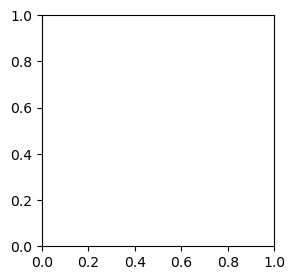

In [19]:
flg = f'128'
rec_prb_angle0 = dxchange.read_tiff(f'/data/vnikitin/rec_prb_angle{flg}.tiff')

fig, ax = plt.subplots(1, figsize=(3,3))
mshow(rec_prb_angle0[0,pad:-pad,pad:-pad],cmap='gray',vmin=-0.6,vmax=0.6)
ax.add_artist(ScaleBar(voxelsize,location='lower right'))
plt.colorbar(fraction=0.046, pad=0.04)
# plt.show()
!mkdir figs
plt.savefig(f'figs/rec_prb_angle{flg}.png',dpi=300,bbox_inches='tight')
for k in [16,32,64,96,128,256]:
    print(k)
    flg = f'{k}'
    rec_prb_angle = dxchange.read_tiff(f'/data/vnikitin/rec_prb_angle{flg}.tiff')
    fig, ax = plt.subplots(1, figsize=(3,3))
    mshow(rec_prb_angle[0,pad:-pad,pad:-pad],cmap='gray',vmin=-0.6,vmax=0.6)
    ax.add_artist(ScaleBar(voxelsize,location='lower right'))
    if k==256:
        plt.colorbar(fraction=0.046, pad=0.04)
    # plt.show()
    !mkdir figs
    plt.savefig(f'figs/rec_prb_angle{flg}.png',dpi=300,bbox_inches='tight')

    fig, ax = plt.subplots(1, figsize=(3,3))
    mshow(rec_prb_angle[0,pad:-pad,pad:-pad]-rec_prb_angle0[0,pad:-pad,pad:-pad],cmap='gray',vmin=-0.2,vmax=0.2)
    ax.add_artist(ScaleBar(voxelsize,location='lower right'))
    if k==256:
        plt.colorbar(fraction=0.046, pad=0.04)
    # plt.show()
    !mkdir figs
    plt.savefig(f'figs/rec_prb_angle_dig{flg}.png',dpi=300,bbox_inches='tight')
